# БИХ-фильтры

Рассмотрим примеры применения БИХ-фильтров.

### Денойзер

Сначала рассмотрим применения денойзера.

Подгрузим библиотеки, сигнал и методы для рисования графиков.

In [15]:
from scipy.io import wavfile

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift, rfft, fftfreq
from scipy import signal
import IPython

fs, data = wavfile.read('source/LetsGo.wav')
data = data/np.max(data)

C:\Users\AlexK\AppData\Local\Temp\ipykernel_6324\2660708904.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read('source/LetsGo.wav')


In [17]:
def myDFT_AmplPlot(t, x, N=512, fs = None, xLim = 0.5):    
    if len(x)>512:
        N = len(x)
        
    xFFT = fftshift(fft(x, N))
    # Амплитуда спектра
    xA = np.abs(xFFT)
    
    if fs == None:
        fs = 1    
    freqs = fftshift(fftfreq(N, d = 1/fs))
    # Графики
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 2, 1)
    plt.title('Сигнал')
    plt.plot(t, x)
    plt.xlabel('Временные отсчёты')

    plt.subplot(1, 2, 2)
    plt.plot(freqs,xA)
    plt.xlabel('Частоты')
    plt.xlim([0, fs*xLim])
    plt.xticks(np.linspace(0, fs*xLim, 11))
    plt.grid()
    plt.tight_layout()
    
    
def plot_response(w, h, fs, title):
    plt.figure(figsize=(5,2))
    plt.plot(w, 10*np.log10(np.abs(h)))
    plt.ylim(-40, 5)
    plt.xlim(0, 0.5*fs)
    plt.grid(True)
    plt.xlabel('Частота')
    plt.ylabel('Амплитуда (дБ)')
    plt.title(title)
    

Чтобы шум был слышим, добавим его в виде тона на 500 Гц.

In [19]:
noise_freq = 500
t = np.arange(0,len(data)) / fs

noise = np.sin(2*np.pi*noise_freq*t)
y_noised = data + 0.75*noise

IPython.display.Audio(y_noised, rate=fs)

In [21]:
r=0.999
c0=2*np.cos(2*np.pi*noise_freq/fs)
af = np.array([1, - r*c0, r**2])
bf = np.array([1, -c0, 1])
print(af)
print(bf)

[ 1.         -1.99293238  0.998001  ]
[ 1.        -1.9949273  1.       ]


(0.0, 882.0)

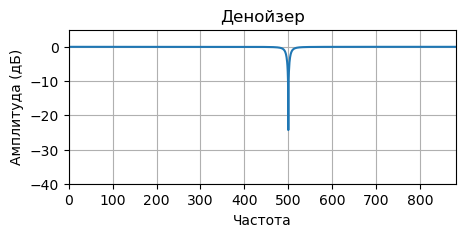

In [23]:
w, h = signal.freqz(bf, af, worN=2**15, fs=fs)

plot_response(w, h, fs, "Денойзер")
plt.xlim(0,0.02*fs)

In [25]:
y_filt = signal.lfilter(bf, af, np.float16(y_noised))
IPython.display.Audio(y_filt, rate=fs)

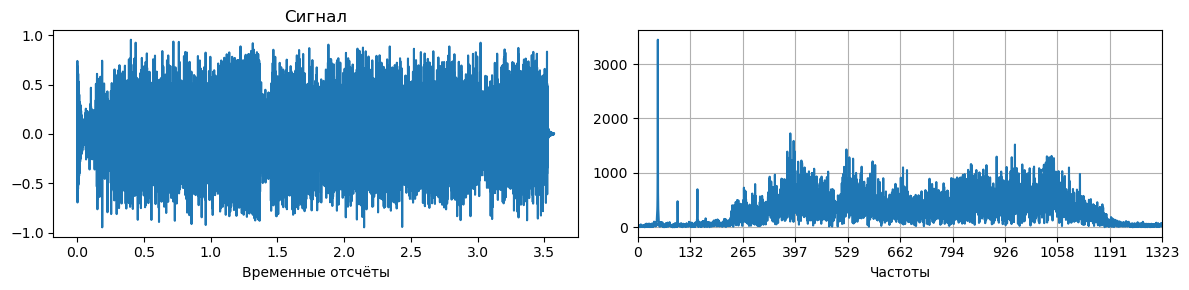

In [27]:
myDFT_AmplPlot(t, y_filt, fs = fs, xLim=0.03)

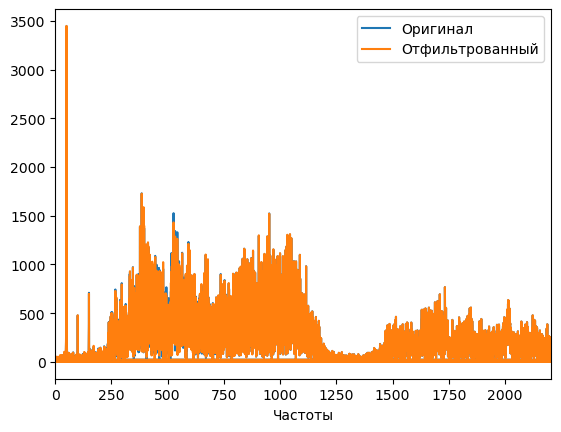

In [29]:
yFFT = np.abs(fft(y_filt))
dataFFT = np.abs(fft(data))
N = len(yFFT)
sig = np.array([dataFFT, yFFT]).T
t= np.arange(N)*fs/N

plt.plot(t,sig)
plt.xlabel('Частоты')
plt.xlim([0, fs*0.05])
plt.legend(["Оригинал","Отфильтрованный"])

In [31]:
def mySNR(sig,noise):
    return 10*np.log10(np.sum(np.abs(sig)**2)/np.sum(np.abs(noise)**2))

In [33]:
print('SNR для зашумлённого сигнала: ', mySNR(data, y_noised))
print('SNR для очищенного сигнала: ', mySNR(data, y_filt-data))

SNR для зашумлённого сигнала:  -6.490618711882402
SNR для очищенного сигнала:  15.858773943345227


### Фильтр Карплюса-Стронга

Реализуем фильтр Карплюса-Стронга

In [35]:
from random import random
from scipy.io.wavfile import write
from scipy.signal import lfilter, freqz

import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
from scipy import signal
import IPython

from scipy.io import wavfile

import numpy as np
import matplotlib.pyplot as plt

# создание фильтра КС
def get_KS_filter(M, alpha):
    b = np.array([1]) 
    a = np.array([1] + ([0]*(M-1)) + [-alpha]) 
    return b,a   

Выведем его АЧХ.

882.0


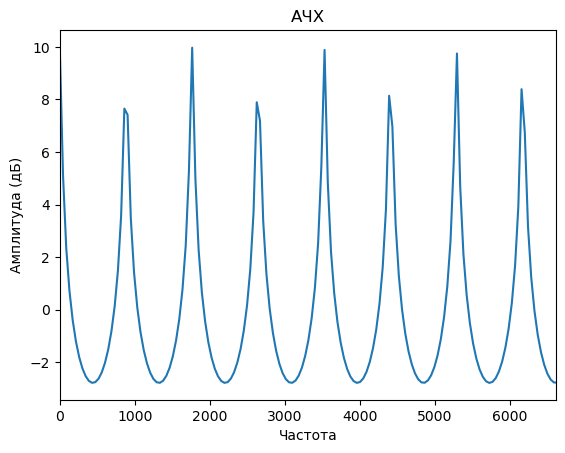

In [37]:
fs = 44100
M = 50
alpha = 0.9
b,a = get_KS_filter(M, alpha)

# График АЧХ
w,h = signal.freqz(b,a,fs=fs)
plt.plot(w, 10 * np.log10(abs(h)))
plt.xlim(0,0.15*fs)
plt.ylabel('Амплитуда (дБ)')
plt.xlabel('Частота')
plt.title('АЧХ')

print(fs/M)

### Задача

Напишите код для генерации звучания ноты по заданной частоте `freq` в герцах и длительности `dur` в секундах с помощью фильтра Карплюса-Стронга. 

In [39]:
def get_note(freq, dur, fs):    
    ...
    return sig 

In [41]:
sig = get_note(220, 3, fs = 44100)
display.Audio(sig, rate=44100, embed=True)

In [43]:
sig2 = get_note(1500, 3, fs = 44100)
display.Audio(sig2, rate=44100, embed=True)

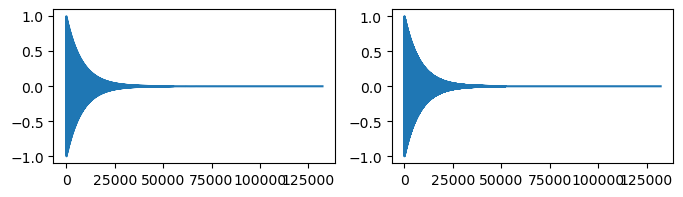

In [45]:
plt.figure(figsize=(8,2))
plt.subplot(121)
plt.plot(sig)
plt.subplot(122)
plt.plot(sig2)

Можно также добавить эффект плавного старта.

In [49]:
sig = get_note(440, 3, fs = 44100)
display.Audio(sig, rate=44100, embed=True)

Далее, для формирования мелодии по списку нот (или частот) удобно написать специальный метод:

In [51]:
def get_melody(melody, fs):
    dur = 0.5
    x = []
    for note in melody:
        x = x + list(get_note(note, dur, fs))        
    
    return np.array(x)

Сформируем некоторую мелодию.

In [53]:
notes = ['A', 'A#', 'Bb', 'B', 'C', 'C#', 'Db', 'D', 'D#', 'Eb', 'E', 'F', 'F#', 'Gb', 'G', 'G#', 'Ab']
valueSet = [0,1,1,2,3,4,4,5,6,6,7,8,9,9,10,11,11]

noteDict = dict(zip(notes, valueSet))

song = ['A','A','E','E' ,'F#' ,'F#','E', 'E', 'D','D', 'C#','C#','B','B','A']

melody = [440 * 2 ** (noteDict[note]/12) for note in song]

In [55]:
x = get_melody(melody, fs)

display.Audio(x, rate=44100, embed=True)

In [57]:
fs_filt, filt = wavfile.read('source/impulse_cathedral.wav')
y = signal.lfilter(np.float16(filt), [1], np.float16(x))
IPython.display.Audio(y, rate=fs)

Добавим небольшой эффект эха.

In [59]:
# формирование фильтра
filt = np.zeros(np.int16(0.1*fs))
filt[0] = 1
filt[np.int16(len(filt)/2)] = 1.2
filt[-1] = 0.6

y2 = signal.lfilter(np.float16(filt), [1], y)
IPython.display.Audio(y2, rate=fs)

Можно сверху применить ещё какой-нибудь фильтр, например, фильтр Баттерворта, для приглушения высоких частот.

In [62]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [64]:
b, a = signal.butter(5, 1000, 'low', fs = fs)
w, h = signal.freqz(b, a, fs=8000)
print(b)
print(a)

[1.46896340e-06 7.34481698e-06 1.46896340e-05 1.46896340e-05
 7.34481698e-06 1.46896340e-06]
[ 1.         -4.53905152  8.26066093 -7.53334038  3.44208742 -0.63030945]


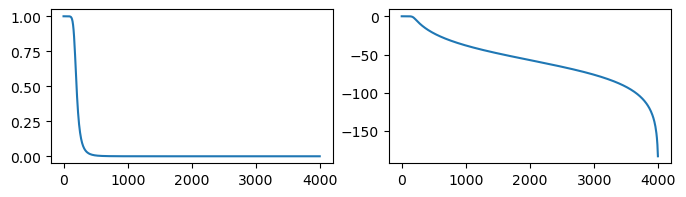

In [66]:
plt.figure(figsize=(8,2))
plt.subplot(121)
plt.plot(w,abs(h))
plt.subplot(122)
plt.plot(w, 10 * np.log10(abs(h)))

In [68]:
y3 = signal.lfilter(b, a, y2)
IPython.display.Audio(y3, rate=fs)

In [70]:
def wave(fs,samples,name="melody") :
    scaled = np.int16(samples/np.max(np.abs(samples)) * 32767)
    write(name+'.wav', fs, scaled)
     
filename = "LittleStar"
wave(fs, y3, filename)

# Фазовый сдвиг

Продемонстрируем также эффект фазовой задержки сигнала на примере.

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift, rfft
from scipy import signal
import IPython

def plot_response(w, h, fs, title):
    plt.figure(figsize=(5,2))
    plt.plot(w, 10*np.log10(np.abs(h)))
    plt.ylim(-40, 5)
    plt.xlim(0, 0.5*fs)
    plt.grid(True)
    plt.xlabel('Частота')
    plt.ylabel('Амплитуда (дБ)')
    plt.title(title)

Сформируем синусоиду с шумом.

In [74]:
w1 = 10  ## частота синуса
a1 = 1   ## амплитуда синуса
alpha = 0.2 ## амплитуда шума
Fs = 8000  ## частота дискретизации
Ts = 1.0/Fs ## интервал времени между соседними точками

t = np.arange(0, 1, Ts)
## cигнал из трёх компонент
y = a1*np.sin(2*np.pi*w1*t)

N = len(t) 
#np.random.seed(42)
## добавляем шум в данные
y_noise = y + alpha*np.random.randn(N)

Рассмотрим простой фильтр скользящего среднего.

(0.0, 400.0)

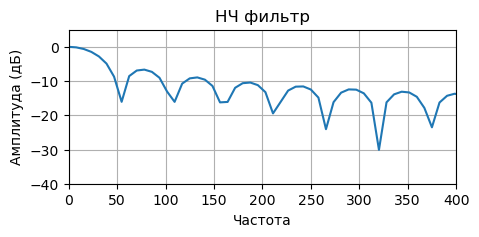

In [76]:
lp_filter = np.ones(150)/150

w, h = signal.freqz(lp_filter, [1], fs=Fs)
plot_response(w,h,Fs,"НЧ фильтр")
plt.xlim(0, 0.05*Fs)

Проведём фильтрацию.

In [78]:
y_filt = signal.lfilter(lp_filter, [1], y_noise)

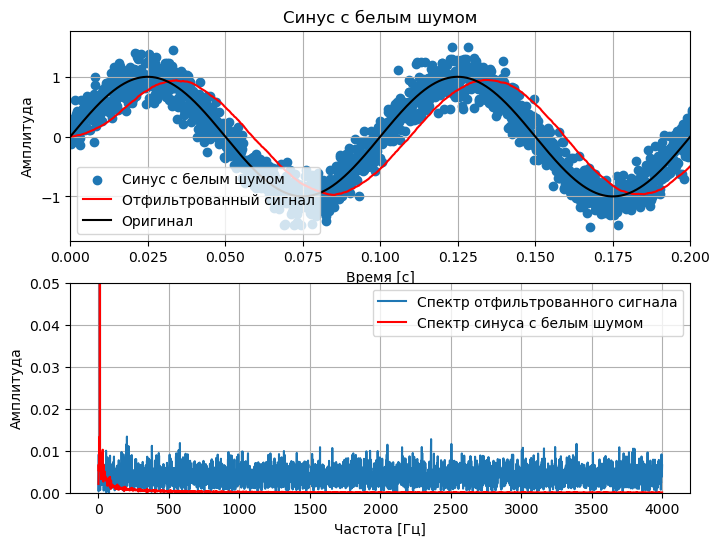

In [80]:
## создаём сетку частот
frq = np.fft.fftfreq(N, Ts)[range(int(N/2))]
## делаем преобразование Фурье cигнала с шумом
Y = 2/N * np.fft.fft(y_noise)[range(int(N/2))]
## делаем преобразование Фурье отфильтрованного cигнала
Y_filt = 2/N * np.fft.fft(y_filt)[range(int(N/2))]

## рисуем графики
f, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].scatter(t, y_noise)
ax[0].plot(t, y_filt, c='r')
ax[0].plot(t, y, c='k')
ax[0].set_xlim([0, 0.2])
ax[0].set_ylabel('Амплитуда')
ax[0].set_xlabel('Время [c]')
ax[0].set_title('Cинус с белым шумом')
ax[0].legend(['Cинус с белым шумом','Отфильтрованный сигнал', 'Оригинал'])
ax[0].grid()

ax[1].plot(frq, abs(Y))
ax[1].plot(frq, abs(Y_filt), c='r')
ax[1].set_xlabel('Частота [Гц]')
ax[1].set_ylabel('Амплитуда')
# ax[1].set_xlim([0, 200])
ax[1].set_ylim([0, 0.05])
ax[1].legend(['Cпектр отфильтрованного сигнала', 'Спектр синуса с белым шумом'])
ax[1].grid()

Как видно из графика, отфильтрованный сигнал действительно имеет некоторую задержку относительно исходной синусоиды.

Метод `y = signal.lfilter(b,[1],x)` реализован по формуле

$$y[n] = b[0]*x[n] + b[1]*x[n-1] + ... + b[M]*x[n-M] $$

Причём для вычисления $y[0]$ используются по умолчанию нулевые отсчёты $x[-M], ..., x[-1]$.


Задержки можно избежать при использовании метода `signal.filtfilt`.

In [82]:
lp_filter2 = np.ones(150)/150
y_filt2 = signal.filtfilt(lp_filter2, [1], y_noise, padlen=150)

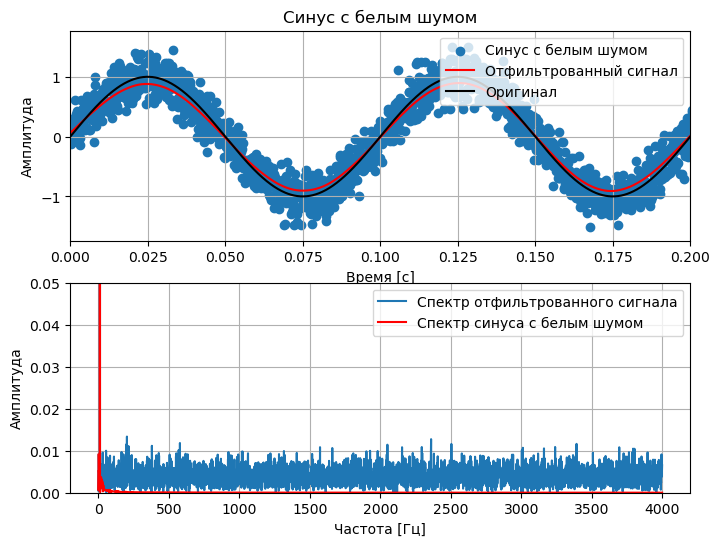

In [84]:
## создаём сетку частот
frq = np.fft.fftfreq(N, Ts)[range(int(N/2))]
## делаем преобразование Фурье cигнала с шумом
Y = 2/N * np.fft.fft(y_noise)[range(int(N/2))]
## делаем преобразование Фурье отфильтрованного cигнала
Y_filt2 = 2/N * np.fft.fft(y_filt2)[range(int(N/2))]

## визуализируем ряд
f, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].scatter(t, y_noise)
ax[0].plot(t, y_filt2, c='r')
ax[0].plot(t, y, c='k')
ax[0].set_xlim([0, 0.2])
ax[0].set_ylabel('Амплитуда')
ax[0].set_xlabel('Время [c]')
ax[0].set_title('Cинус с белым шумом')
ax[0].legend(['Cинус с белым шумом','Отфильтрованный сигнал', 'Оригинал'])
ax[0].grid()

ax[1].plot(frq, abs(Y))
ax[1].plot(frq, abs(Y_filt2), c='r')
ax[1].set_xlabel('Частота [Гц]')
ax[1].set_ylabel('Амплитуда')
# ax[1].set_xlim([0, 200])
ax[1].set_ylim([0, 0.05])
ax[1].legend(['Cпектр отфильтрованного сигнала', 'Спектр синуса с белым шумом'])
ax[1].grid()